# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [425]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [426]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()
#hospital_read_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [427]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df= clean_hospital_read_df.copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

#clean_hospital_read_df.head(10)
clean_hospital_read_df.tail(10)
#clean_hospital_read_df.info()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8818,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HF-HRRP,2509,NaN,0.9712,21.8,22.5,546.0,07/01/2010,06/30/2013
572,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-COPD-HRRP,2565,NaN,1.1637,23.7,20.4,619.0,07/01/2010,06/30/2013
136,"BEAUMONT HOSPITAL, ROYAL OAK",230130,MI,READM-30-HIP-KNEE-HRRP,2581,NaN,1.2577,7.5,5.9,197.0,07/01/2010,06/30/2013
1698,FLORIDA HOSPITAL,100007,FL,READM-30-HIP-KNEE-HRRP,2596,NaN,1.0962,5.6,5.1,147.0,07/01/2010,06/30/2013
1242,FLORIDA HOSPITAL,100007,FL,READM-30-COPD-HRRP,2705,NaN,1.1148,22.0,19.7,603.0,07/01/2010,06/30/2013
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


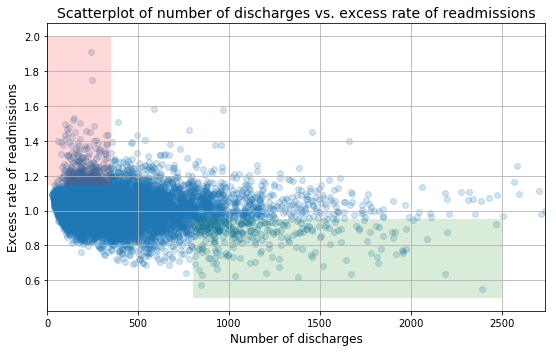

In [428]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


# My work

It is difficult to agree with conclusions and recommendations presented above, because they were made by looking only at the regions of small and large number of discharges. These regions contain only small fraction of samples out of the total population. We see from the figure that the highest number of hospitals have the numbers of discharges lying between 100 and 1000 (only 15 percent have the number of discharges smaller than 100 or larger than 1000). This middle range of the number of discharges that was excluded form analysis.

In [429]:
len(list(clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]['Number of Discharges'].index))/ \
len(list(clean_hospital_read_df['Number of Discharges'].index)) + \
len(list(clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]['Number of Discharges'].index))/ \
len(list(clean_hospital_read_df['Number of Discharges'].index))


0.14959405769562964

In [430]:
mask1 = (clean_hospital_read_df['Number of Discharges'] < 100)
mask2 = (clean_hospital_read_df['Number of Discharges'] < 200) & (clean_hospital_read_df['Number of Discharges'] >= 100)
mask3 = (clean_hospital_read_df['Number of Discharges'] < 300) & (clean_hospital_read_df['Number of Discharges'] >= 200)
mask4 = (clean_hospital_read_df['Number of Discharges'] < 500) & (clean_hospital_read_df['Number of Discharges'] >= 300)
mask6 = (clean_hospital_read_df['Number of Discharges'] >= 500)

len(list(clean_hospital_read_df[mask4]['Number of Discharges'].index))/ \
len(list(clean_hospital_read_df['Number of Discharges'].index))

0.23967870098462601

Let's compute the mean and standard deviation of the data in 'Excess Readmission Ratio' columns averaged over all hospitals, (dropping the non-essential number of NaN values). The mean is 1.0075037835957146 and is only slightly higher than 1! The standard deviation is 0.09196026645631224. The total number of observations N = 11578 and is a large number for statistical analysis. We can't say anything about the distribution of excess readmission ratios themselves, albeit we know that mean of ratios obeys normal distribution due to large N. If experiments were repeated many times, then with 99 percent probability the average value of excess readmission ratio will lie between 1.00530237566 and 1.00970519153. Thus, we can say that the problem of excess readmission ratio is of both statistical and practical significance.

In [431]:
from scipy import stats

#the number of samples
N = len(list(clean_hospital_read_df['Excess Readmission Ratio'].index))
print('total number of samples = ', N, '\n')

mean = np.mean(clean_hospital_read_df['Excess Readmission Ratio'].dropna())
std = np.std(clean_hospital_read_df['Excess Readmission Ratio'].dropna())
print('mean =',mean, '\t', 'standard deviation =',std, '\n')

interv = stats.norm.interval(0.99, loc = mean, scale = std/np.sqrt(N))
print("With 99 percent probability the average value of excess readmission ratio will lie between", 
      interv[0], "and", interv[1])

total number of samples =  11578 

mean = 1.0075037835957146 	 standard deviation = 0.09196026645631224 

With 99 percent probability the average value of excess readmission ratio will lie between 1.00530237566 and 1.00970519153


The next issue we investigate is whether the excess readmission ratio is correlated with the number of discharges. We compute the corresponding Pearson coefficient. The Pearson coefficient between the excess readmission ratio and number of discharges values is equal to -0.0930955428759, and this suggests that these values are loosely correlated.

In [432]:
num_dis = clean_hospital_read_df['Number of Discharges'][81:-3]
ERR = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

pearson_obs = np.corrcoef(num_dis, ERR)[0,1]

print('Pearson coefficient between the excess readmition ratio and number of discharges values =', pearson_obs)

Pearson coefficient between the excess readmition ratio and number of discharges values = -0.0930955428759


Let's test the null hypothesis that excess readmission ratio and number of discharges values are uncorrelated. To do this, permute the number of discharges values but leave the excess readmission ratio values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, we compute the Pearson correlation coefficient and assess how many of the permutation replicates have a Pearson correlation coefficient greater in absolute value than the absolute value of the observed one.


In [433]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute number of discharges: num_dis_permuted
    num_dis_permuted = np.random.permutation(num_dis)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(num_dis_permuted, ERR)[0,1]
    
# Compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(pearson_obs))/len(perm_replicates)
print('p-value =', p)


p-value = 0.0


The p-value is equal to zero meaning that our null-hypothesis should be rejected, and excess readmission ratio and number of discharges are indeed correlated. To quantify this correlation further, we can examine the confidence intervals on the Pearson correlation coefficient. So, we resort to pairs bootstrap, and compute the 99% confidence interval for the Pearson coefficient. We see that the 99% confidence interval for the Pearson coefficient is [-0.122, -0.065]

In [434]:
# function that computes the Paarson coefficient
def pearson_r(u,v):
    return np.corrcoef(u, v)[0,1]


def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap and computes a single statistic on the pairs samples."""

    # Set up array of indicesto sample from: inds
    inds = x.index

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)
        

    return bs_replicates


# Acquire 10000 bootstrap replicates of Pearson r
bs_replicates = draw_bs_pairs(num_dis, ERR, pearson_r, 10000)

# Compute 99% confidence intervals
conf_int = np.percentile(bs_replicates, [0.5, 99.5])

print('99% confidence interval for Pearson coefficient:', conf_int)

99% confidence interval for Pearson coefficient: [-0.12193206 -0.0650179 ]


Next, we apply the linear fit. As one can see from below, slope is small and negative, while the value of the intercept is only slightly larger than 1. The value of the slope is equal to -2.856e-05, while the value of the intercept is 1.018.
We can deduce also that the linear fit function reaches the value of 1.0 when the number of discharges is equal to 628.
We also plot the linear fit together with the scatter plot of number of discharges vs. excess rate of readmissions.

slope = -2.85650529438e-05
intercept = 1.01794755795


The linear fit function reaches the value of 1.0 when the number of discharges is: 628


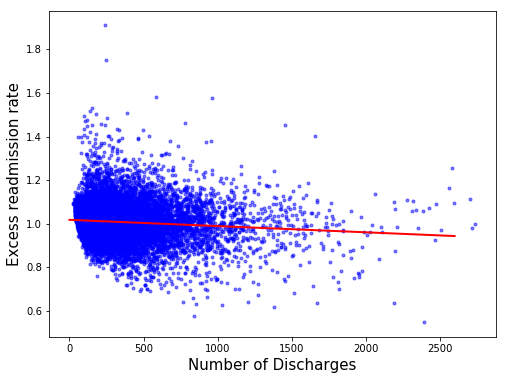

In [435]:
slope, intercept = np.polyfit(num_dis, ERR, 1)
print('slope =', slope)
print('intercept =', intercept)

cc = (1.0-intercept)/slope

print('\n')
print("The linear fit function reaches the value of 1.0 when the number of discharges is:", int(cc))

#Plot the lineasr fit on top of the scatter plot
x = np.array([0, 2600])

plt.figure(figsize=(8,6))
plt.plot(num_dis, ERR, marker= '.', linestyle='none', color='blue', alpha=0.5)
plt.xlabel('Number of Discharges', fontsize =15)
plt.ylabel('Excess readmission rate',  fontsize =15)


plt.plot(x, slope* x + intercept,
             linewidth=2.0, alpha=1.0, color='red')
plt.show()

We see that the scatter plot is good to visualize data, detect outliers, evaluate minima and maxima. However, it is not very useful when we deal with dense data. When many points are plotted next to each other, we can't determine how many points lie within a given interval and, as a result, are not able to determine how much statistical weight the interval carries. To illustrate this point, let's break the total number of discharges into the bins of size 50 and plot the number of hospitals with discharges pertaining to each bin. As one can see from the plot below, the overwhelming majority of hospitals have the numbers of discharges between 50 and 600. The number of hospitals per bin is peaked at the number of discharges 100 and decreases with increasing value of the left point of a bin.     

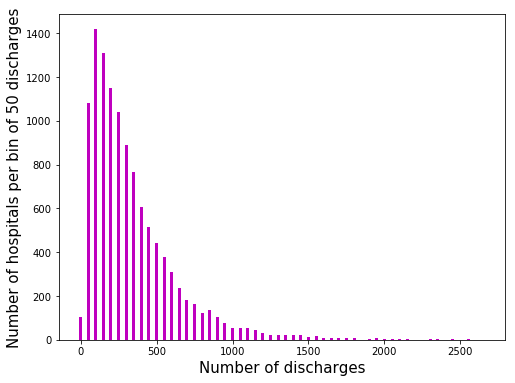

In [436]:
#np.max(num_dis)
#np.min(num_dis)

x2 = [50*i for i in range(54)]
y2 = np.empty(len(x2))

for i in range(len(x2)-1):
    mask = (clean_hospital_read_df['Number of Discharges'] < x2[i+1]) & \
    (clean_hospital_read_df['Number of Discharges'] >= x2[i])
    
    #y2[i] = np.mean(clean_hospital_read_df[mask]['Excess Readmission Ratio'].dropna())
    y2[i] = len(clean_hospital_read_df[mask]['Excess Readmission Ratio'].dropna())

plt.figure(figsize=(8,6))
plt.bar(x2, y2, color = 'm', width = 20)
plt.xlabel('Number of discharges',fontsize =15)
plt.ylabel('Number of hospitals per bin of 50 discharges',fontsize =15)
plt.show()


We then make a similar (albeit scatter) plot of excess readmission ratio averaged over each bin. We see that the averages are close to 1 but fluctuate more for hospitals with higher numbers of discharges. The linear fit is presented as well. The plot below shows that there is a correlation between hospital capacity (number of discharges) and readmission ratios, although this correlation becomes practically insignificant for hospitals with high numbers of discharges. 

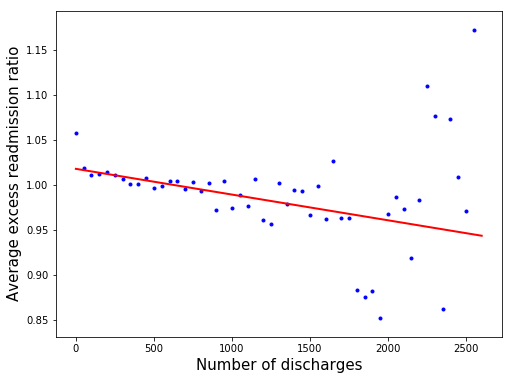

In [437]:
x2 = [50*i for i in range(53)]
y2 = np.empty(len(x2))

for i in range(len(x2)-1):
    mask = (clean_hospital_read_df['Number of Discharges'] < x2[i+1]) & \
    (clean_hospital_read_df['Number of Discharges'] >= x2[i])
    
    y2[i] = np.mean(clean_hospital_read_df[mask]['Excess Readmission Ratio'].dropna())


plt.figure(figsize=(8,6))
plt.scatter(x2[:-1], y2[:-1], color = 'b', marker = '.')
plt.xlabel('Number of discharges',fontsize =15)
plt.ylabel('Average excess readmission ratio',fontsize =15)

x = np.array([0, 2600])
plt.plot(x, slope* x + intercept,
             linewidth=2.0, alpha=1.0, color='red')

plt.show()

CONCLUSION

1) The number of discharges and readmission ratios are correlated, although this correlation becomes less significant for hospitals with high numbers of discharges.

2) There is a significant number of hospitals with excess readmission ratios irrespective of the number of discharges (hospital capacities). This means that these hospitals should be required to demonstrate how they would improve the quality of care to continue operation.
